<a href="https://colab.research.google.com/github/abid-mugdho9875/Deep_learning/blob/main/flower_classification_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Make predictions using ready made model (without any training)

In [3]:
image_shape=(224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4",input_shape=image_shape + (3,))
])


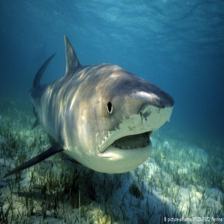

In [4]:
shark = Image.open('/content/gdrive/MyDrive/shark/shark1.jpg').resize(image_shape)
shark

In [5]:
shark = np.array(shark)/255.0
shark.shape

(224, 224, 3)

In [6]:
shark[np.newaxis, ...]

array([[[[0.08235294, 0.24313725, 0.35294118],
         [0.09019608, 0.2627451 , 0.36862745],
         [0.09411765, 0.2745098 , 0.37647059],
         ...,
         [0.0627451 , 0.25490196, 0.37254902],
         [0.0627451 , 0.25490196, 0.37254902],
         [0.0627451 , 0.25490196, 0.37254902]],

        [[0.08235294, 0.24705882, 0.35294118],
         [0.08627451, 0.25882353, 0.36470588],
         [0.08627451, 0.26666667, 0.36862745],
         ...,
         [0.08235294, 0.2745098 , 0.39215686],
         [0.08235294, 0.2745098 , 0.39215686],
         [0.07058824, 0.2627451 , 0.38039216]],

        [[0.08235294, 0.24313725, 0.35294118],
         [0.08235294, 0.25490196, 0.36078431],
         [0.08627451, 0.26666667, 0.36862745],
         ...,
         [0.10980392, 0.30196078, 0.41960784],
         [0.10588235, 0.29803922, 0.41568627],
         [0.09411765, 0.28627451, 0.40392157]],

        ...,

        [[0.09411765, 0.11764706, 0.08627451],
         [0.16078431, 0.18823529, 0.15686275]

In [7]:
result = classifier.predict(shark[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

4

background<br>
tench<br>
goldfish<br>
great white shark<br>
tiger shark<br>
hammerhead<br>
electric ray<br>


## from Above list we find shark as lebel 4 classes

# New Section

Load flowers dataset

In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [10]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'),
 PosixPath('datasets/flower_photos/roses/4724951744_61877ec101_n.jpg'),
 PosixPath('datasets/flower_photos/roses/99383371_37a5ac12a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15681454551_b6f73ce443_n.jpg')]

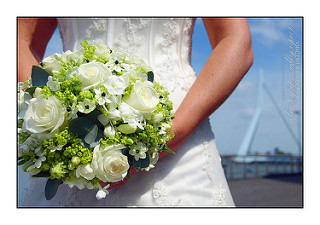

In [13]:
Image.open(str(roses[1]))

Read flowers images from disk into numpy array using opencv

In [14]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [15]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [16]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'

In [17]:

img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [18]:
img.shape

(375, 500, 3)

In [19]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [21]:
X = np.array(X)
y = np.array(y)

# Trian Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Scale Images

In [23]:

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Make Prediction Using Pretrained Model

In [24]:
X[0].shape

(224, 224, 3)

In [25]:
image_shape + (3,)

(224, 224, 3)

In [26]:
x0_resized = cv2.resize(X[0], image_shape)
x1_resized = cv2.resize(X[1], image_shape)
x2_resized = cv2.resize(X[2], image_shape)

In [27]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([806, 612, 647])

Retrain it using flowers image

In [28]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [29]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:

model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 7s 39ms/step - loss: 1.1814 - acc: 0.5391
Epoch 2/5
86/86 [==============================] - 3s 39ms/step - loss: 0.4429 - acc: 0.8579
Epoch 3/5
86/86 [==============================] - 3s 39ms/step - loss: 0.3310 - acc: 0.8954
Epoch 4/5
86/86 [==============================] - 3s 39ms/step - loss: 0.2726 - acc: 0.9176
Epoch 5/5
86/86 [==============================] - 3s 39ms/step - loss: 0.2233 - acc: 0.9375


Evaluate Model

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 53ms/step - loss: 0.3687 - acc: 0.8649


[0.3687301278114319, 0.8649237751960754]

We can see that we find better accuracy just a train of 5 epochhs.